# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1 - Is the distribution normal ?

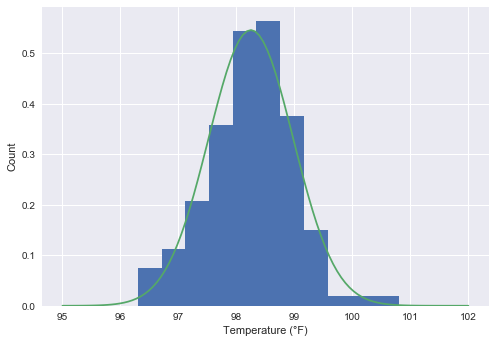

In [27]:
# Your work here.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

sns.set()

#Let's have a look at the data
# Number of bins = square root of number of data points
n_bins = int(round(np.sqrt(len(df['temperature'])),0))

# Plot histogram of temperature
_=plt.hist(df['temperature'],bins=n_bins,normed=True)
#Plot normal distribution
x_norm = np.linspace(95, 102, 100)
#mean and stdev for our data --> used to obtain normal distribution with similar mean and spread
temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)
pdf = stats.norm.pdf(x_norm, temp_mean, temp_std)
_=plt.plot(x_norm,pdf)
# Label axes
_=plt.xlabel('Temperature (°F)')
_=plt.ylabel('Count')
# Show histogram
plt.show()

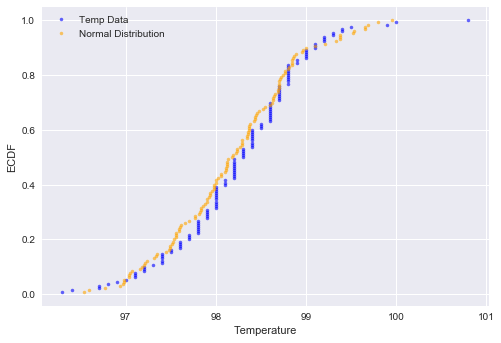

In [17]:
#ecdf function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,1+n) / n

    return x, y

#Let's plot ECDF of our data and of normally distributed data
central = np.random.normal(temp_mean,temp_std,len(df.temperature))

x_temp,y_temp=ecdf(df.temperature)
x_central,y_central=ecdf(central)

_=plt.plot(x_temp,y_temp,marker='.',linestyle='none',color='blue',alpha=0.6)
_=plt.plot(x_central,y_central,marker='.',linestyle='none',color='orange',alpha=0.6)
_=plt.xlabel('Temperature')
_=plt.ylabel('ECDF')
_=plt.legend(('Temp Data','Normal Distribution'))
plt.show()

The temperature's ECDF matches the normal distribution's one. We can say that distribution of body temp is normal.

### 2 - Is sample size large ? Are Observations independant ?

CLT recommends n>30, and sample size is 130. So it is large.

Body temperatures are independant from each other as they come from different people.

### 3 - Is the true population mean really 98.6 degrees F?
#### Would you use a one-sample or two-sample test? Why?
I'd use a one-sample test as we only have one sample here, and we want to compare it to a given mean, not to another sample mean:

Null Hypothesis H0 is sample mean = 98.6 °F
<br>Alternative H1 is sample mean < 98.6 °F

#### In this situation, is it appropriate to use the  $t$ or $z$  statistic?
it's the $t$ statistics because we do not know about the population's stdev. But we know stdev from sample --> we can use t-test. Though, t and z will be the same as we use same std ...

In [62]:
from scipy import stats
from statsmodels.stats.weightstats import ztest
import statsmodels.stats.api as sms

t_score, pValue_t = stats.ttest_1samp(df.temperature, 98.6, axis=0)
print('t_score is {:1.8f}, p-value is {:1.8f}'.format(t_score,pValue_t))

z_score, pValue_z = ztest(x1= df.temperature, x2=None, value=98.6, alternative='two-sided', usevar='pooled', ddof=1)
print('z_score is {:1.8f}, p-value is {:1.8f}'.format(z_score,pValue_z))



t_score is -5.45482329, p-value is 0.00000024
z_score is -5.45482329, p-value is 0.00000005


The t-score here above tells us that population mean for the sample is likely to be below the given one of 98.6
Let's do some bootstrap replicates to confirm this:

In [40]:
bs_samples=np.empty(1000)
for i in range(1000):
    bs_samples[i] = np.mean(np.random.choice(df.temperature, size=len(df.temperature)))
    
#Now we have 1000 means from bootstrap replicates. Let's look at the t-value again:

t_stat=(np.mean(bs_samples) - 98.6)/(np.std(bs_samples)/np.sqrt(len(bs_samples)))

p_value = np.sum(bs_samples>98.6)/len(bs_samples)

print('t-value bootstrap = {:1.3f} and p-value = {:1.20f}'.format(t_stat,p_value))
print('Mean body temperature is below 98.6°F !')

t-value bootstrap = -175.524 and p-value = 0.00000000000000000000
Mean body temperature is below 98.6°F !


### 4 - Draw a small sample of size 10 from the data and repeat both tests. 
Which one is the correct one to use? 
Now it is the z-test because we have less than 30 data.



In [63]:
small_sample = np.random.choice(df.temperature,10)

t_score, pValue_t = stats.ttest_1samp(small_sample, 98.6, axis=0)
print('t_score is {:1.8f}, p-value is {:1.8f}'.format(t_score,pValue_t))

z_score, pValue_z = ztest(x1= small_sample, x2=None, value=98.6, alternative='two-sided', usevar='pooled', ddof=1)
print('z_score is {:1.8f}, p-value is {:1.8f}'.format(z_score,pValue_z))


t_score is -1.03545174, p-value is 0.32747747
z_score is -1.03545174, p-value is 0.30045799


What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?<br>
It is a smaller value thant what i observed with t-test on whole sample. We can rejet the null hypothesis as p value is high (which means there is a good probability of having data below 98.6F).

### 5 - At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [73]:
# confidence interval for the sample mean within 2 standard errors 
interval = stats.norm.interval(0.95, loc=temp_mean, scale=(temp_std/np.sqrt(len(df.temperature))))
print('Interval of confidence for 95% is : ', interval)

#We use std/sqrt(n) because of n observations in sample. See : http://napitupulu-jon.appspot.com/posts/confidence-interval-coursera-statistics.html

#or 95% CI is also mean +/- 1.96*stdev
low = temp_mean-1.96*(temp_std/np.sqrt(len(df.temperature)))
high=temp_mean+1.96*(temp_std/np.sqrt(len(df.temperature)))
print(low,high)
#Ok it's the same

#Margin of error ME is half of interval:
moe = 0.5*(interval[1]-interval[0])
print('Margin of error = ',moe)

Interval of confidence for 95% is :  (98.123682111456645, 98.37477942700491)
98.1236798044 98.374781734
Margin of error =  0.125548657774


98.6 is out of this range !! So it is abnormal.

### 6 - Is there a significant difference between males and females in normal temperature?



In [77]:
#isolate men and women
men = df[df.gender == 'M']
women = df[df.gender == 'F']
print('Mens',len(men.temperature),' and Womens ',len(women.temperature)) 

Mens 65  and Womens  65


In [79]:
#Testing null hypothesis that mean temperature is the same for Men and Women:

z_score, pValue_z = ztest(x1= men.temperature, x2=women.temperature, value=0, alternative='two-sided', usevar='pooled', ddof=1)
print('z_score is {:1.8f}, p-value is {:1.8f}'.format(z_score,pValue_z))

z_score is -2.28543454, p-value is 0.02228736


p-value is low enough to rejet null hypothesis with significance level of 95% --> It means probability of having same mean is really low. Let's look with a visual:

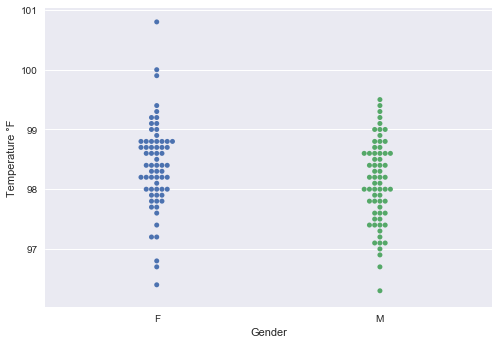

In [81]:
sns.swarmplot(x= df.gender,y=df.temperature)
plt.xlabel('Gender')
plt.ylabel('Temperature °F')
plt.show()

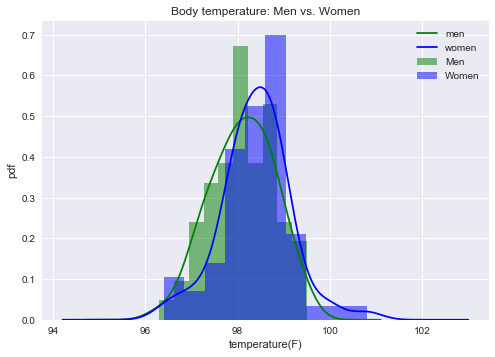

In [85]:
men.temperature.plot(kind='hist', bins=10, color = 'green', normed= True,label= 'Men', alpha = 0.5)
men.temperature.plot(kind='kde',color = 'green', label= 'men' )
women.temperature.plot(kind='hist', bins=10, color = 'blue', normed= True, label= 'Women',alpha = 0.5)
women.temperature.plot(kind='kde',color = 'blue',label = 'women')
plt.legend(loc='upper right')
plt.title('Body temperature: Men vs. Women')
plt.xlabel('temperature(F)')
plt.ylabel('pdf')
plt.show()

There is significant difference between the means of males and females (cfr low p-value).
<br> The dataset does not enable me to explain why, but male and female have slightly different body temperatures.
<br> Also, the 98.6 °F body temperature we always hear about is not that accurate as it is outside the 95% confidence interval. Even with 10 observations, we can see that it is not likely that the mean body temperature is 98.6.